In [1]:
import pandas as pd
import numpy as np

In [4]:
df_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
df_white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

If your internet connection is slow, you can directly read from the local files. Uncomment (remove #) before you execute.

In [5]:
#df_red = pd.read_csv('winequality-red.csv', sep=";")
#df_white = pd.read_csv('winequality-red.csv', sep=";")

In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Assing input (X) and output (y)

In [8]:
y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:-1]

Split training set and test set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Normalize X data (on training set)

In [10]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,-1.271945e-16,1.000447,-2.090941,-0.712549,-0.253085,0.550977,4.341555
1,1119.0,-1.214399e-16,1.000447,-2.214153,-0.757544,-0.056214,0.591167,5.662322
2,1119.0,-2.622765e-16,1.000447,-1.396757,-0.934734,-0.062025,0.759348,3.736827
3,1119.0,2.115277e-16,1.000447,-1.108115,-0.438669,-0.237836,0.029943,8.665794
4,1119.0,-1.587450e-18,1.000447,-1.527181,-0.356857,-0.175255,0.046703,10.559442
5,1119.0,1.438627e-16,1.000447,-1.419711,-0.767974,-0.209341,0.535501,5.190770
6,1119.0,1.230274e-17,1.000447,-1.210217,-0.743039,-0.275861,0.454105,7.052999
7,1119.0,-5.975193e-14,1.000447,-3.520329,-0.608117,-0.018302,0.582045,3.652243
8,1119.0,1.005551e-15,1.000447,-3.669365,-0.638236,0.006686,0.587115,4.521134
9,1119.0,-3.551920e-17,1.000447,-1.626274,-0.618757,-0.226944,0.388761,7.497358


Instead we can use the pipeline method introduced in  [Ch 5 of PML](https://github.com/PHBS/python-machine-learning-book/blob/master/code/ch06/ch06.ipynb). We sequentially apply normilization, PCA (first 2 components) and logistic regression and get about 89% accuracy!

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.892


We replaced LogisticRegression with Support Vector Machine with RBF kernel. The accuracy is similarly 89%.

In [40]:
from sklearn.svm import SVC

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('svm', SVC(kernel='rbf', random_state=0, gamma=0.20, C=5.0))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.894


# Linear regresssion on wine quality using four features: 'chlorides', 'density', 'volatile acidity', 'quality'

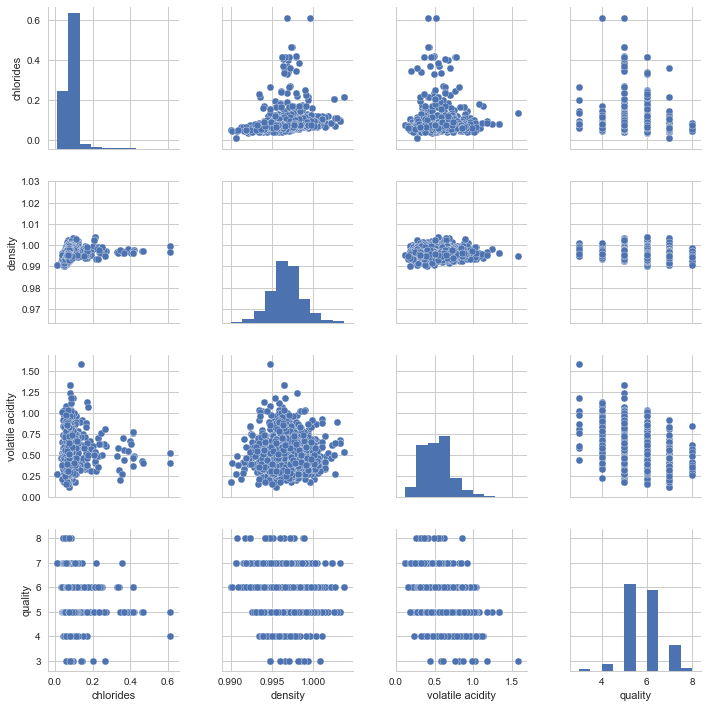

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['chlorides', 'density', 'volatile acidity', 'quality' ]

sns.pairplot(df_red[cols], size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

## Simple regression: 'volatility acidity' vs 'quality'

In [66]:
X = df_red[['volatile acidity']].values
y = df_red['quality'].values

In [67]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

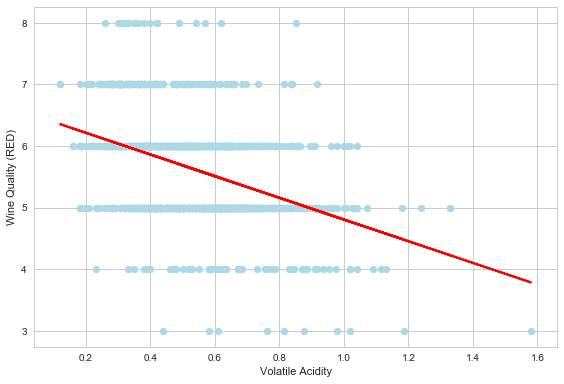

Slope: -1.761
Intercept: 6.566


In [68]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

lin_regplot(X, y, slr)
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Quality (RED)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)


## Simple regression using TensorFlow

In [69]:
import tensorflow as tf

In [70]:
# Need to convert ndarray to python list (tensor)
X_list = X.reshape(-1).tolist()
y_list = y.tolist()

w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Model hypothesis XW+b
y_list_hat = X_list * w + b

# Cost/loss function
cost = tf.reduce_mean(tf.square(y_list - y_list_hat))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [71]:
# Train the weight and bias
for step in range(16001):
    sess.run(train)
    if step % 2000 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 36.6545 [-1.44514203] [ 0.39055499]
2000 0.55712 [-1.37644362] [ 6.35734367]
4000 0.552432 [-1.70905519] [ 6.53738976]
6000 0.552346 [-1.75428486] [ 6.5618701]
8000 0.552344 [-1.76044106] [ 6.56520176]
10000 0.552344 [-1.76126349] [ 6.5656476]
12000 0.552344 [-1.76129329] [ 6.56566334]
14000 0.552344 [-1.76129329] [ 6.56566334]
16000 0.552344 [-1.76129329] [ 6.56566334]


## Simple regression using TensorFlow wiht placeholder

In [72]:
X_ph = tf.placeholder(tf.float32, shape=[None])
y_ph = tf.placeholder(tf.float32, shape=[None])

w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
y_list_hat = X_ph * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(y_ph - y_list_hat))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(16001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, w, b, train],
                 feed_dict={X_ph: X_list, y_ph: y_list})
    if step % 1000 == 0:
        print(step, cost_val, W_val, b_val)

0 34.3375 [ 0.19267848] [ 0.0266571]
1000 0.631646 [-0.19426621] [ 5.71741819]
2000 0.563133 [-1.1833899] [ 6.25284147]
3000 0.553812 [-1.54822409] [ 6.45033073]
4000 0.552544 [-1.68279266] [ 6.52317381]
5000 0.552371 [-1.73242211] [ 6.55003786]
6000 0.552348 [-1.75071645] [ 6.55993891]
7000 0.552345 [-1.75746298] [ 6.56359386]
8000 0.552344 [-1.75995755] [ 6.56494617]
9000 0.552344 [-1.76089418] [ 6.56545258]
10000 0.552344 [-1.76121497] [ 6.56562233]
11000 0.552344 [-1.76129329] [ 6.56566334]
12000 0.552344 [-1.76129329] [ 6.56566334]
13000 0.552344 [-1.76129329] [ 6.56566334]
14000 0.552344 [-1.76129329] [ 6.56566334]
15000 0.552344 [-1.76129329] [ 6.56566334]
16000 0.552344 [-1.76129329] [ 6.56566334]


## Multi-variate regression

In [103]:
X = df_red[cols].values
X = X[:,0:-1]

X_list = X.reshape(-1,3).tolist()
y_list = y.reshape(-1,1).tolist()

# Standardize variables
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

X_std_list = X_std.reshape(-1,3).tolist()
y_std_list = y_std.reshape(-1,1).tolist()

D:\sw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [96]:
slr = LinearRegression()
slr.fit(X, y)
print('Slope: ', slr.coef_)
print('Intercept: ', slr.intercept_)

Slope:  [ -1.28810558 -64.79517091  -1.72564093]
Intercept:  71.2438887704


In [125]:
X_ph = tf.placeholder(tf.float32, shape=[None, 3])
y_ph = tf.placeholder(tf.float32, shape=[None, 1])

# Now the weight W include the intercept
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
y_hat = tf.matmul(X_ph, W[1:]) + W[0]

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(y_hat - y_ph))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Train the weights (it's very slow because we didn't standardized)
for step in range(20001):
    cost_val, W_val, _ = \
        sess.run([cost, W, train],
                 feed_dict={X_ph: X_list, y_ph: y_list})
    if step % 1000 == 0:
        print(step, cost_val, W_val.flatten())

0 38.0314 [ 0.73911262  0.16889851  1.08163476  0.89463615]
1000 0.550956 [ 3.16171312 -0.44821754  3.4427979  -1.74003601]
2000 0.548469 [ 3.20989394 -0.94010222  3.44021416 -1.744663  ]
3000 0.547432 [ 3.24711156 -1.25705385  3.42812443 -1.73976266]
4000 0.546995 [ 3.27937031 -1.46123195  3.41200948 -1.73657572]
5000 0.546807 [ 3.30843568 -1.59273851  3.39331412 -1.73452127]
6000 0.546723 [ 3.33545399 -1.67741692  3.37294626 -1.7331996 ]
7000 0.546681 [ 3.36113262 -1.73191714  3.35151815 -1.73234236]
8000 0.546658 [ 3.38594317 -1.76697111  3.32941318 -1.73178911]
9000 0.546642 [ 3.41021323 -1.7894938   3.30685568 -1.73143566]
10000 0.546629 [ 3.43412304 -1.80394244  3.28401732 -1.73120928]
11000 0.546617 [ 3.45775175 -1.81318605  3.26104403 -1.73106015]
12000 0.546606 [ 3.48126388 -1.81907749  3.23791862 -1.73095739]
13000 0.546595 [ 3.50463653 -1.8228085   3.21476817 -1.73090172]
14000 0.546584 [ 3.52800155 -1.82514703  3.19151044 -1.73086071]
15000 0.546573 [ 3.55136013 -1.82658672

In [127]:
# Train the weights (it's fast)
for step in range(10001):
    cost_val, W_val, _ = \
        sess.run([cost, W, train],
                 feed_dict={X_ph: X_std_list, y_ph: y_std_list})
    if step % 1000 == 0:
        print(step, cost_val, W_val.flatten())

0 18.2983 [ 2.34718943 -1.3794831   2.0251658  -1.23259616]
1000 0.814399 [ -3.73398201e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
2000 0.814399 [ -3.78039555e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
3000 0.814399 [ -3.82680909e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
4000 0.814399 [ -3.87322263e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
5000 0.814399 [ -3.91963617e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
6000 0.814399 [ -3.96604971e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
7000 0.814399 [ -4.01246325e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
8000 0.814399 [ -4.05887679e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
9000 0.814399 [ -3.73276077e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]
10000 0.814399 [ -3.77917431e-09  -7.50710666e-02  -1.51429817e-01  -3.82620603e-01]


In [128]:
# recover the coefficients in the original scale
W_val[1:].flatten()/sc_x.scale_*sc_y.scale_

array([ -1.28810603, -64.79515313,  -1.72564066])